In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import xml.etree.ElementTree as ET
import zipfile

warnings.filterwarnings("ignore")

In [116]:
order_det = pd.read_csv("order_details.csv", sep=";")
orders = pd.read_csv("orders.csv", sep=";")
types = pd.read_csv("pizza_types.csv")
pizzas = pd.read_csv("pizzas.csv")

### Analyze data

In [117]:
order_det

,order_details_id,order_id,pizza_id,quantity
0,21671,9513,cali-ckn-m,NaN
1,17259,7591,green garden s,1
2,19844,8724,the-greek-xl,1
3,24185,10625,NaN,1
4,13779,6037,thai_ckn_m,1
...,...,...,...,...
48615,31782,14027,classic dlx s,NaN
48616,24419,10731,the_greek_m,1
48617,31389,13858,classic_dlx_l,One
48618,32757,14481,NaN,1


In [118]:
order_det.isna().sum()/order_det.count()

order_details_id    0.000000
order_id            0.000000
pizza_id            0.132093
quantity            0.107668
dtype: float64

In [119]:
order_det.dropna(subset="pizza_id", inplace=True)
order_det["quantity"] = order_det["quantity"].fillna(order_det["quantity"].mode()[0])
order_det.isna().sum()/order_det.count()

order_details_id    0.0
order_id            0.0
pizza_id            0.0
quantity            0.0
dtype: float64

In [120]:
np.sort(order_det["quantity"].unique())

array(['-1', '-2', '1', '2', '3', '4', 'One', 'one', 'two'], dtype=object)

In [121]:
order_det["quantity"] = order_det["quantity"].str.replace("[oO]ne", "1").str.replace("two", "2")
order_det = order_det[~order_det["quantity"].isin(("-1", "-2"))]
np.sort(order_det["quantity"].unique())

array(['1', '2', '3', '4'], dtype=object)

In [122]:
order_det["pizza_id"] = order_det["pizza_id"].str.replace(r"[- ]", "_").str.replace("3", "e").str.replace("@", "a").str.replace("0", "o")
np.sort(order_det["pizza_id"].unique())

array(['bbq_ckn_l', 'bbq_ckn_m', 'bbq_ckn_s', 'big_meat_s',
       'brie_carre_s', 'calabrese_l', 'calabrese_m', 'calabrese_s',
       'cali_ckn_l', 'cali_ckn_m', 'cali_ckn_s', 'ckn_alfredo_l',
       'ckn_alfredo_m', 'ckn_alfredo_s', 'ckn_pesto_l', 'ckn_pesto_m',
       'ckn_pesto_s', 'classic_dlx_l', 'classic_dlx_m', 'classic_dlx_s',
       'five_cheese_l', 'four_cheese_l', 'four_cheese_m',
       'green_garden_l', 'green_garden_m', 'green_garden_s', 'hawaiian_l',
       'hawaiian_m', 'hawaiian_s', 'ital_cpcllo_l', 'ital_cpcllo_m',
       'ital_cpcllo_s', 'ital_supr_l', 'ital_supr_m', 'ital_supr_s',
       'ital_veggie_l', 'ital_veggie_m', 'ital_veggie_s',
       'mediterraneo_l', 'mediterraneo_m', 'mediterraneo_s', 'mexicana_l',
       'mexicana_m', 'mexicana_s', 'napolitana_l', 'napolitana_m',
       'napolitana_s', 'pep_msh_pep_l', 'pep_msh_pep_m', 'pep_msh_pep_s',
       'pepperoni_l', 'pepperoni_m', 'pepperoni_s', 'peppr_salami_l',
       'peppr_salami_m', 'peppr_salami_s', 'prs

In [123]:
order_det.dtypes

order_details_id     int64
order_id             int64
pizza_id            object
quantity            object
dtype: object

In [124]:
order_det["quantity"] = pd.to_numeric(order_det["quantity"])
order_det.index = range(order_det.shape[0])
order_det.dtypes

order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object

In [125]:
order_det

,order_details_id,order_id,pizza_id,quantity
0,21671,9513,cali_ckn_m,1
1,17259,7591,green_garden_s,1
2,19844,8724,the_greek_xl,1
3,13779,6037,thai_ckn_m,1
4,24800,10908,thai_ckn_m,1
...,...,...,...,...
41692,31831,14052,classic_dlx_m,1
41693,31782,14027,classic_dlx_s,1
41694,24419,10731,the_greek_m,1
41695,31389,13858,classic_dlx_l,1


In [126]:
orders

,order_id,date,time
0,8886,May 29 2016,18:58 PM
1,11424,2016-07-10,14:36:32
2,19361,"Saturday,26 November, 2016",18:42 PM
3,4489,2016-03-17,NaN
4,6838,NaN,15:09:12
...,...,...,...
21345,1989,"Tuesday,02 February, 2016",21H 15M 17S
21346,3795,Mar 5 2016,NaN
21347,6474,19-04-16 16:20:01,NaN
21348,20125,2016-12-08,18:12 PM


In [127]:
orders.isna().sum()/orders.shape[0]

order_id    0.000000
date        0.110211
time        0.095457
dtype: float64

In [128]:
orders = orders.drop(columns="time")
orders = orders.dropna()
orders["date"].head(15)

0                    May 29 2016
1                     2016-07-10
2     Saturday,26 November, 2016
3                     2016-03-17
5                    Apr 30 2016
6                   1478386800.0
7              04-03-16 14:45:20
8              15-01-16 18:04:29
9                    May 11 2016
11             19-06-16 20:04:41
12                    2016-03-06
13      Monday,14 November, 2016
14                   Sep 30 2016
15                   Jul 24 2016
16      Friday,25 November, 2016
Name: date, dtype: object

In [129]:
bad_dates = []
for g_date, b_date in zip(pd.to_datetime(orders["date"], errors="coerce"), orders["date"]):
    if pd.isnull(g_date):
        bad_dates.append(b_date)

print(bad_dates)
# Todas las fechas que pd.to_datetime no convierte son del siguiente formato

['1478386800.0', '1467496800.0', '1455404400.0', '1465336800.0', '1479078000.0', '1462485600.0', '1461448800.0', '1460325600.0', '1475532000.0', '1477954800.0', '1460066400.0', '1468792800.0', '1470088800.0', '1460671200.0', '1482534000.0', '1463695200.0', '1474927200.0', '1475791200.0', '1480287600.0', '1457218800.0', '1454972400.0', '1455058800.0', '1454108400.0', '1468015200.0', '1458428400.0', '1477868400.0', '1462744800.0', '1456095600.0', '1480114800.0', '1471298400.0', '1464818400.0', '1453071600.0', '1452034800.0', '1468447200.0', '1453762800.0', '1457391600.0', '1461448800.0', '1457823600.0', '1475964000.0', '1467669600.0', '1458342000.0', '1470088800.0', '1473631200.0', '1465250400.0', '1458514800.0', '1476396000.0', '1468015200.0', '1461189600.0', '1467410400.0', '1461362400.0', '1453762800.0', '1472076000.0', '1458342000.0', '1480460400.0', '1474840800.0', '1454713200.0', '1479510000.0', '1473890400.0', '1453158000.0', '1459461600.0', '1462053600.0', '1459202400.0', '145531

In [130]:
print(list(map(lambda f: float(f)/3600/24/365, bad_dates)))

# Si dividimos cada número entre 3600 (horas), 24 (días) y 365 (años) podemos ver que todos los resultados son 46 + un número
# menor que 1, permitiendo deducir que representa segundos pasados desde el año 1970 (por qué alguien formatearía la fecha así
# se escapa de mi comprensión)

[46.87933789954337, 46.534018264840185, 46.150570776255705, 46.465525114155255, 46.90125570776255, 46.37511415525115, 46.342237442922375, 46.30662100456621, 46.78881278538813, 46.86563926940639, 46.298401826484024, 46.57511415525114, 46.6162100456621, 46.3175799086758, 47.010844748858446, 46.413470319634705, 46.76963470319635, 46.797031963470324, 46.939611872146116, 46.20810502283105, 46.13687214611872, 46.13961187214611, 46.10947488584475, 46.55045662100457, 46.24646118721461, 46.862899543378994, 46.38333333333334, 46.172488584474884, 46.93413242009132, 46.654566210045665, 46.44908675799087, 46.076598173515976, 46.04372146118721, 46.56415525114156, 46.098515981735154, 46.21358447488584, 46.342237442922375, 46.22728310502283, 46.80251141552512, 46.53949771689498, 46.243721461187214, 46.6162100456621, 46.728538812785395, 46.462785388127855, 46.24920091324201, 46.8162100456621, 46.55045662100457, 46.33401826484019, 46.53127853881279, 46.33949771689498, 46.098515981735154, 46.679223744292

In [131]:
def format_bad_dates(date):
    day_in_months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    mins, _ = divmod(float(date), 60)
    hours, mins = divmod(mins, 60)
    days, hours = divmod(hours, 24)
    _, days = divmod(days, 365)
    months = 1
    for month in day_in_months:
        if days-month >= 0:
            days -= month
            months += 1
    return pd.to_datetime(f"{int(days+1)}-{months}-16")

In [132]:
dates = []
for g_date, b_date in zip(pd.to_datetime(orders["date"], errors="coerce"), orders["date"]):
    if pd.isnull(g_date):
        dates.append(format_bad_dates(b_date))
    else:
        dates.append(g_date)

orders["date"] = dates
orders

,order_id,date
0,8886,2016-05-29 00:00:00
1,11424,2016-07-10 00:00:00
2,19361,2016-11-26 00:00:00
3,4489,2016-03-17 00:00:00
5,7112,2016-04-30 00:00:00
...,...,...
21345,1989,2016-02-02 00:00:00
21346,3795,2016-03-05 00:00:00
21347,6474,2016-04-19 16:20:01
21348,20125,2016-12-08 00:00:00


### Predict

In [133]:
types.index = types["pizza_type_id"]
types = types.drop(columns=["pizza_type_id"])
types

,name,category,ingredients
pizza_type_id,,,
bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [134]:
pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [135]:
pizza_types = pizzas["pizza_type_id"].unique()

In [136]:
orders = orders.merge(order_det, on="order_id")
orders["date"] = pd.to_datetime(orders["date"]).map(lambda n: n.timetuple().tm_yday)
orders = orders.drop(columns=["order_id", "order_details_id"])
orders


,date,pizza_id,quantity
0,150,sicilian_m,1
1,192,spin_pesto_m,1
2,192,pepperoni_s,1
3,331,napolitana_s,1
4,331,calabrese_s,1
...,...,...,...
37013,65,spinach_fet_l,1
37014,110,sicilian_s,1
37015,343,classic_dlx_s,1
37016,343,ital_supr_m,1


In [137]:
df = pd.DataFrame(columns=pizza_types, index=range(1, 367))
df = df.fillna(0)
df


,bbq_ckn,cali_ckn,ckn_alfredo,ckn_pesto,southw_ckn,thai_ckn,big_meat,classic_dlx,hawaiian,ital_cpcllo,...,spinach_supr,five_cheese,four_cheese,green_garden,ital_veggie,mediterraneo,mexicana,spin_pesto,spinach_fet,veggie_veg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
pizza_types

array(['bbq_ckn', 'cali_ckn', 'ckn_alfredo', 'ckn_pesto', 'southw_ckn',
       'thai_ckn', 'big_meat', 'classic_dlx', 'hawaiian', 'ital_cpcllo',
       'napolitana', 'pep_msh_pep', 'pepperoni', 'the_greek',
       'brie_carre', 'calabrese', 'ital_supr', 'peppr_salami',
       'prsc_argla', 'sicilian', 'soppressata', 'spicy_ital',
       'spinach_supr', 'five_cheese', 'four_cheese', 'green_garden',
       'ital_veggie', 'mediterraneo', 'mexicana', 'spin_pesto',
       'spinach_fet', 'veggie_veg'], dtype=object)

In [139]:
d = {"_s": 1, "_m": 1.5, "_l": 2, "xl": 3}
for _, row in orders.iterrows():
    pizza_name = "_".join(row["pizza_id"].split("_")[:-1])
    df.at[row["date"], pizza_name] = np.trunc(row["quantity"]*d[row["pizza_id"][-2:]]+df[pizza_name][row["date"]])
df

,bbq_ckn,cali_ckn,ckn_alfredo,ckn_pesto,southw_ckn,thai_ckn,big_meat,classic_dlx,hawaiian,ital_cpcllo,...,spinach_supr,five_cheese,four_cheese,green_garden,ital_veggie,mediterraneo,mexicana,spin_pesto,spinach_fet,veggie_veg
1,8,1,2,0,6,9,5,7,5,8,...,3,10,9,3,2,6,8,2,2,4
2,13,8,2,3,7,12,12,3,15,2,...,0,10,5,0,6,2,4,2,6,6
3,13,7,2,5,9,7,6,4,7,4,...,2,12,9,1,3,4,3,8,3,8
4,4,8,6,1,8,4,1,6,4,6,...,5,6,2,3,4,0,2,6,0,2
5,4,12,9,6,3,6,5,7,9,1,...,2,8,5,2,2,0,5,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,5,0,3,3,8,1,7,4,1,...,0,4,6,1,1,0,3,2,1,10
363,1,4,3,2,5,6,2,10,7,7,...,3,2,6,3,0,0,2,2,5,4
364,3,8,2,2,2,5,4,2,3,2,...,0,2,9,1,0,1,0,6,2,2
365,10,6,0,2,6,4,3,3,4,4,...,3,2,8,2,3,2,4,3,0,4


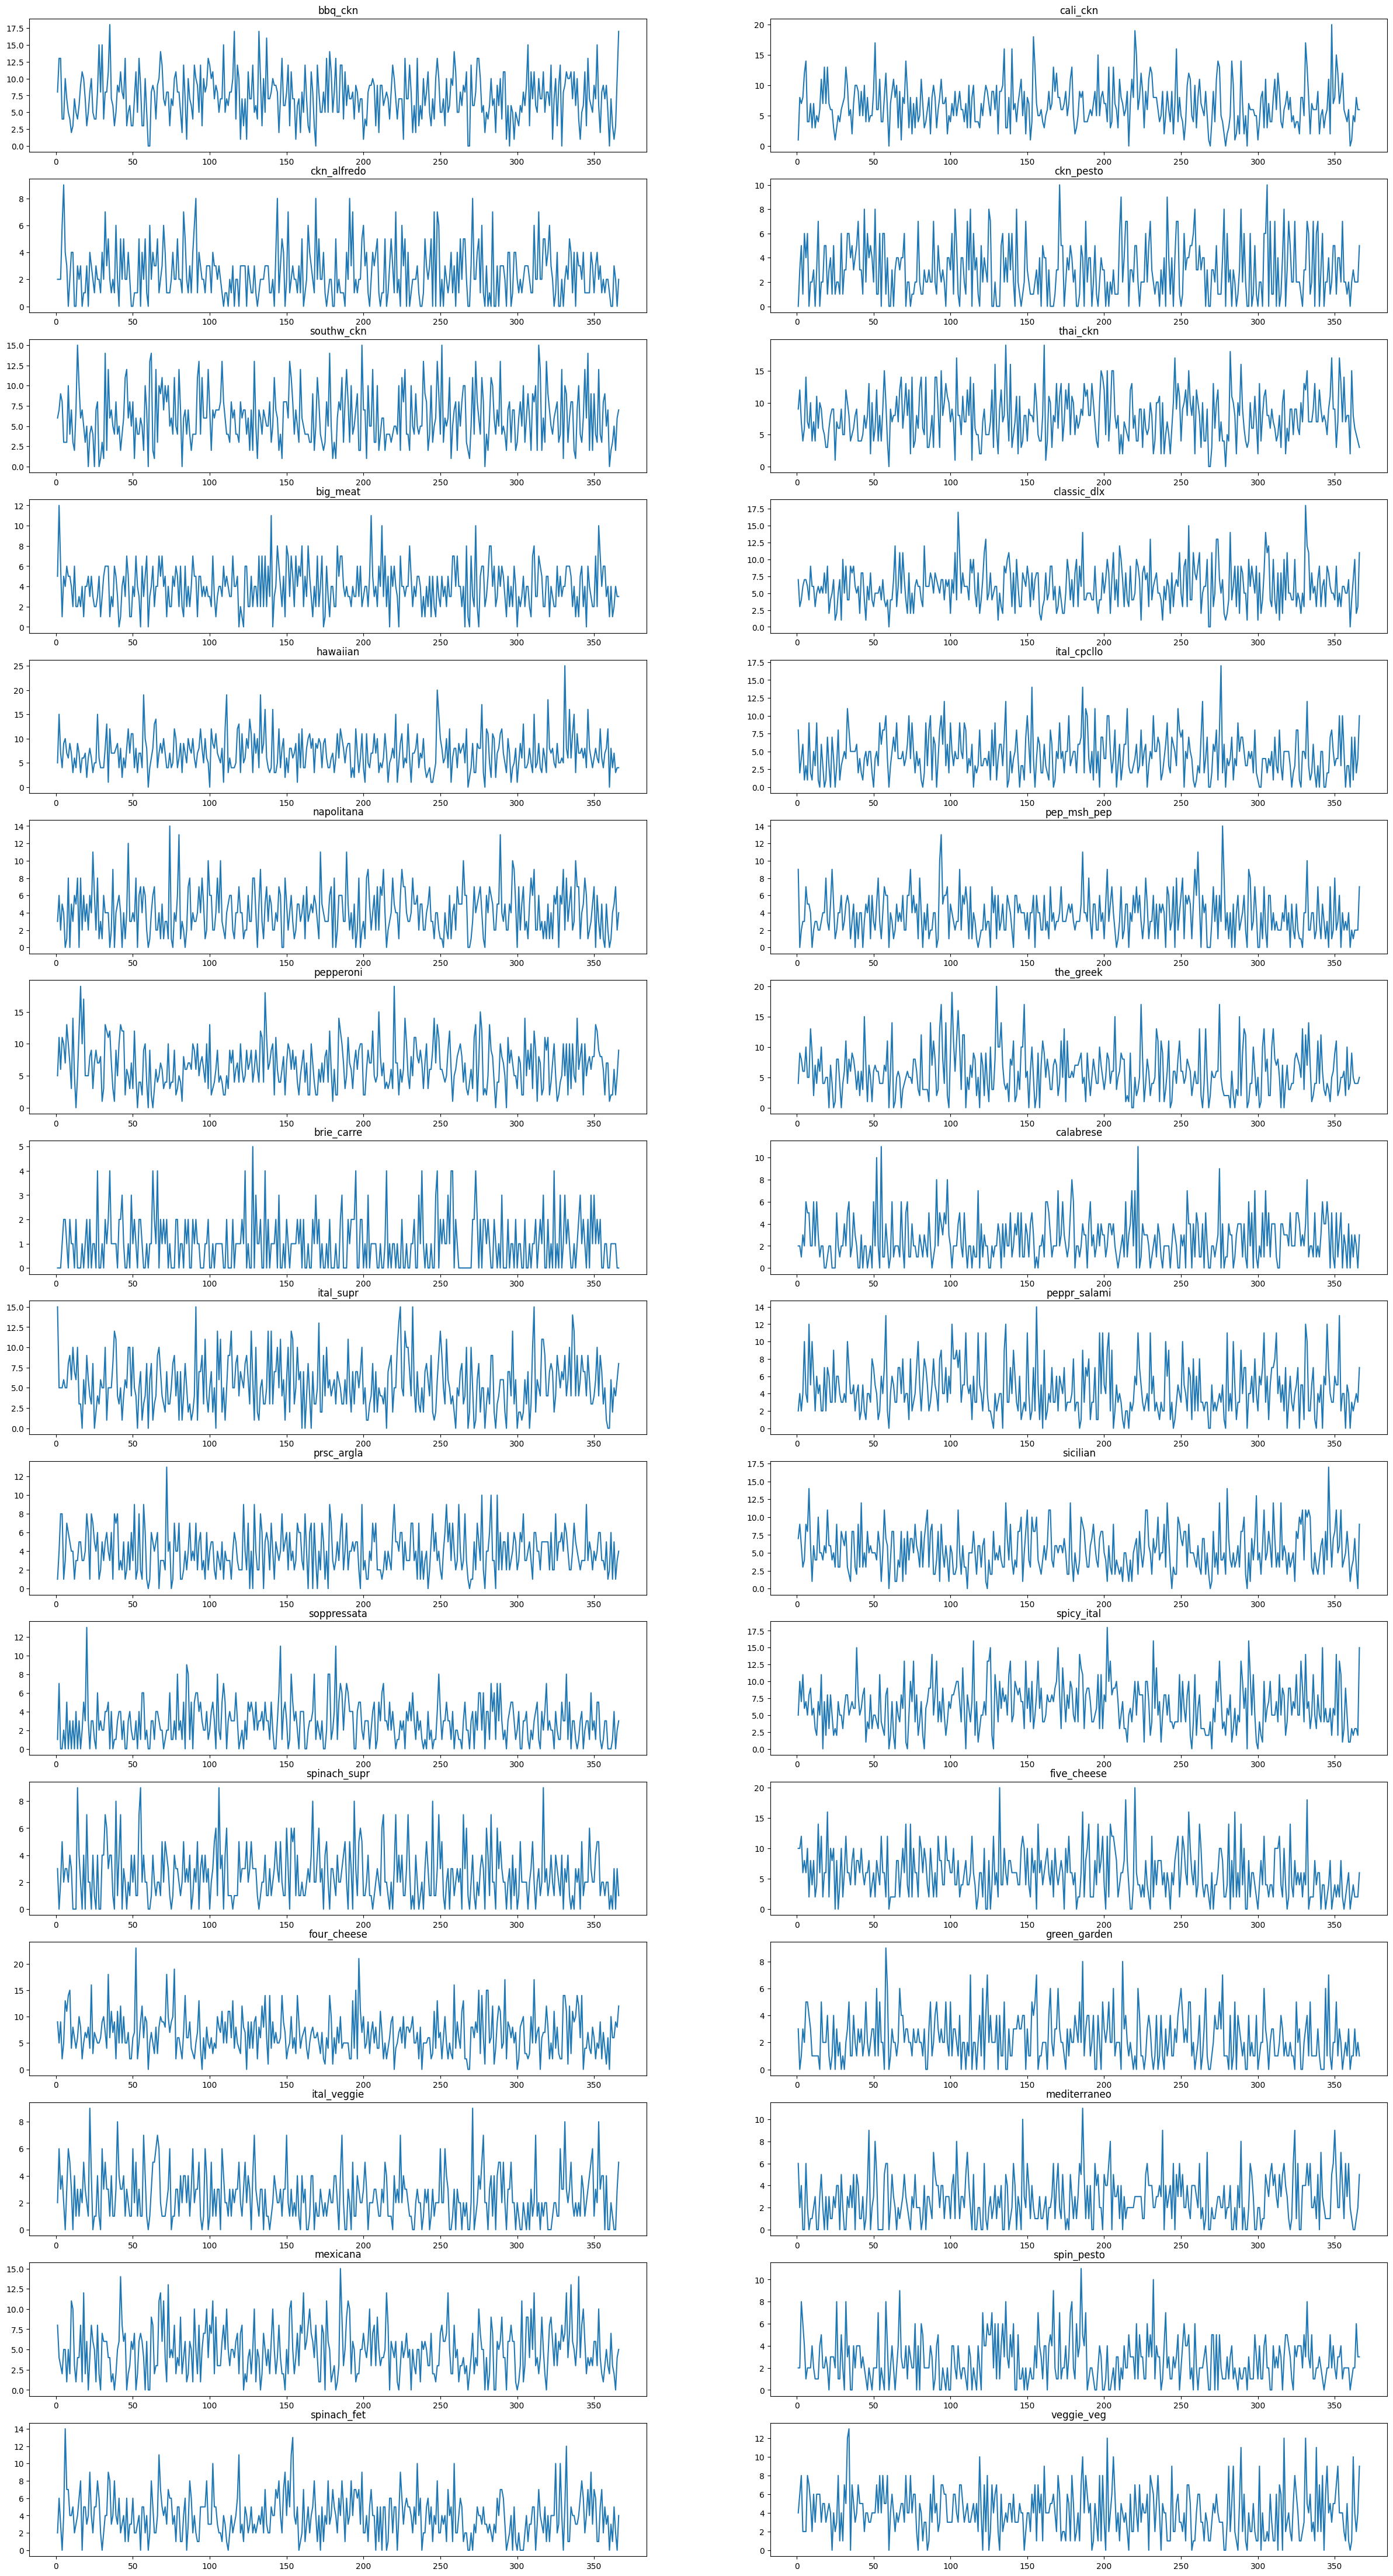

In [140]:
fig = plt.figure(1, figsize=(30, 60))
for i, j in enumerate(pizza_types):
    plt.subplot(len(pizza_types)//2+1, 2, i+1)
    plt.plot(df[j])
    plt.title(j)
plt.show()

In [141]:
def convert_to_ing(day: pd.Series, n_ing: dict, weight):
    for pizza, value in day.items():
        ings = types.loc[pizza]["ingredients"]
        for ing in ings.split(", "):
            n_ing[ing] = n_ing.get(ing, 0)+value*weight
    return n_ing

In [142]:
def represent(day, df: pd.DataFrame):
    expected = {}
    for i in range(1, 8):
        expected = convert_to_ing(df.loc[day-i], expected, weight=3)

    for i in range(1, 3):
        expected = convert_to_ing(df.loc[day-7*i], expected, weight=7)

    expected = {key: int((value//42)*1.5) for key, value in expected.items()}
    print("----Real-----")
    print("real:", convert_to_ing(df.loc[day], {}, 1))
    print("----Predicted-----")
    print("predicted:", expected)


def get_prediction(day, df: pd.DataFrame):
    if not os.path.exists("predictions"):
        os.mkdir("predictions")
    expected = {}
    for day_inc in range(7):
        expected_day = {}
        for i in range(1, 8):
            expected_day = convert_to_ing(df.loc[day+day_inc-i], expected_day, weight=3)

        for i in range(1, 4):
            expected_day = convert_to_ing(df.loc[day+day_inc-7*i], expected_day, weight=7)

        expected[day+day_inc] = {key: int((value//42)*1.5) for key, value in expected_day.items()}

        if day+day_inc > 365:
            break
    
    return pd.DataFrame(expected).T

In [143]:
day = 220
represent(day, df)
prediction = get_prediction(day, df)
prediction.to_csv(f"predictions/prediction{day}.csv")

----Real-----
real: {'Barbecued Chicken': 10, 'Red Peppers': 53, 'Green Peppers': 21, 'Tomatoes': 96, 'Red Onions': 65, 'Barbecue Sauce': 10, 'Chicken': 38, 'Artichoke': 19, 'Spinach': 44, 'Garlic': 119, 'Jalapeno Peppers': 28, 'Fontina Cheese': 21, 'Gouda Cheese': 19, 'Mushrooms': 25, 'Asiago Cheese': 10, 'Alfredo Sauce': 1, 'Pesto Sauce': 10, 'Corn': 9, 'Cilantro': 9, 'Chipotle Sauce': 9, 'Pineapple': 14, 'Thai Sweet Chilli Sauce': 8, 'Bacon': 11, 'Pepperoni': 43, 'Italian Sausage': 6, 'Chorizo Sausage': 6, 'Sliced Ham': 6, 'Mozzarella Cheese': 56, 'Capocollo': 25, 'Goat Cheese': 14, 'Oregano': 4, 'Anchovies': 5, 'Green Olives': 17, 'Kalamata Olives': 11, 'Feta Cheese': 14, 'Beef Chuck Roast': 5, 'Brie Carre Cheese': 1, 'Prosciutto': 1, 'Caramelized Onions': 1, 'Pears': 1, 'Thyme': 1, '�Nduja Salami': 7, 'Pancetta': 7, 'Friggitello Peppers': 7, 'Calabrese Salami': 5, 'Genoa Salami': 6, 'Prosciutto di San Daniele': 9, 'Arugula': 9, 'Coarse Sicilian Salami': 6, 'Luganega Sausage': 6, '

### Save Report

In [144]:
def get_word_xml(docx_filename):
    with open(docx_filename, "rb") as f:
        zip = zipfile.ZipFile(f)
        xml_content = zip.read('word/document.xml')
        return xml_content

In [145]:
def convert_row(row: pd.Series, parent):
    s = ET.SubElement(parent, str(row.name))
    for column in row.index:
        element = ET.SubElement(s, column)
        element.text = str(row[column])
    return s

In [ ]:
root = ET.fromstring(get_word_xml("Informe.docx"))
recommendation = ET.SubElement(root, "recommendation")

for _, row in prediction.iterrows():
    convert_row(row, recommendation)

b_xml = ET.tostring(root)
 
# Opening a file under the name `items2.xml`,
# with operation mode `wb` (write + binary)
with open("Informe.xml", "wb") as f:
    f.write(b_xml)